In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Understading Crank Nicolson

It is a type of finite difference numerical solver. You can divide numerical solutions into two types called **explicit** and **implicit**. A simplistic way of looking at it is whether computing the next step relies on that next step or not.

An explicit solver would maybe solve

$$
f(u^{n+1}, ...) = g(u^n, ...)
$$

where the superscript is e.g. the time step. An implicit form has

$$
f(u^{n+1}, ...) = g(u^{n+1}, ...)
$$

Our temperature function $\theta$ is the heat eqatuation.

$$
\theta_t - \frac{\kappa}{H^2}\theta_{\xi\xi} = \frac{\xi A}{H}\theta_\xi, \ \ \ \theta_b < 0
\tag{1}
$$

and

$$
\theta_t - \frac{\kappa}{H^2}\theta_{\xi\xi} = 0, \ \ \ \theta_b = 0
$$

We can numerically solve it with Crank Nicolson.

The Crank-Nicolson generic solution for a partial differential equation of the form

$$
\frac{\partial u}{\partial t} = F\left(u,x,t,\frac{\partial u}{\partial x},\frac{\partial^2 u}{\partial x^2}\right)
$$

is

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = \frac{1}{2}\left[ F_i^{n+1}\left(u,x,t,\frac{\partial u}{\partial x},\frac{\partial^2 u}{\partial x^2}\right) + F_i^{n}\left(u,x,t,\frac{\partial u}{\partial x},\frac{\partial^2 u}{\partial x^2}\right) \right]
$$

where $F_i^n$ is $F$ evaluated for $i,n$ and $u_i^n$.

$F$ is

$$
F = \frac{\kappa}{H^2}\theta_{\xi\xi} + \frac{\xi A}{H}\theta_\xi
$$

We can discretize it as a "second-order central finite difference" (https://en.wikipedia.org/wiki/Finite_difference) by

$$
f''(x) \approx \frac{\delta_h^2[f](x)}{h^2} = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

In our case $h=\Delta x$ and something like $f(x+h)$ would be $f(x)_{i+1}$.

First order central is

$$
\delta_h[f](x) = f(x+h/2) - f(x-h/2)
$$

From Using https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method#Example:_1D_diffusion_with_advection_for_steady_flow,_with_multiple_channel_connections it seems that I can approximate it with

$$
\delta_h[f](x) = f(x+h/2) - f(x-h/2) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$

Forward

$$
\Delta_h[f](x) = f(x+h) - f(x)
$$

I don't know if it is easy to do the $f(x+h/2)$ hmmm...

The discretization of $\theta_b = 0$ should yield the same as the wikipedia page (https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method#Example:_1D_diffusion) .

### $\theta_b = 0$

$$
\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{1}{2}\left[\text{DISCRET}\frac{\kappa}{H^2}\theta_{\xi\xi}^{n+1} + \text{DISCRET}\frac{\kappa}{H^2}\theta_{\xi\xi}^{n}\right] = \frac{\kappa}{2H^2(\Delta \xi)^2}\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right)
$$

Let $r=\frac{\kappa\Delta t}{2H^2(\Delta \xi)^2}$ and gather the known and unknown terms

$$
-ru_{i+1}^{n+1} + (1+2r)u_i^{n+1} - ru_{i-1}^{n+1} = ru_{i+1}^n - (1+2r)u_i^{n} + ru_{i-1}^n
$$

This is supposedly a tridiagonal problem and can be solved by tridiagonal matrix algorithms.

https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm

If the problem can be formulated as

$$
a_ix_{i-1} + b_ix_i + c_ix_{i+1} = d_i
$$

We can solve it as

$$
Ax=d=
\begin{bmatrix}
b_1 & c_1 & 0 & ... & ... \cr
a_2 & b_2 & c_2 & ... & ... \cr
0 & a_3 & b_3 & ... & ... \cr
... & ... & ... & ... & c_{n-1} \cr
0 & ... & ... & a_n & b_n
\end{bmatrix}
\begin{bmatrix}
x_1 \cr
x_2 \cr
x_3 \cr
... \cr
x_n
\end{bmatrix}
=
\begin{bmatrix}
d_1 \cr
d_2 \cr
d_3 \cr
... \cr
d_n
\end{bmatrix}
$$

### $\theta_b < 0$


The discretization is then

$$
\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{\kappa}{2H^2(\Delta \xi)^2}\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right) + \frac{1}{2}\left[\text{DISCRET}\frac{\xi A}{H}\theta_\xi^{n+1} + \text{DISCRET}\frac{\xi A}{H}\theta_\xi^{n} \right]
$$


$$
\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{\kappa}{2H^2(\Delta \xi)^2}\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right) + \frac{\xi A}{2H}\left[u_{i+1}^{n+1} - u_{i-1}^{n+1} + u_{i+1}^{n} - u_{i-1}^{n} \right]\frac{1}{2\Delta x}
$$

Letting $s=\frac{\xi A \Delta t}{4H\Delta x}$

$$
u_i^{n+1} - u_i^{n} = r\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right) + s\left(u_{i+1}^{n+1} - u_{i-1}^{n+1} + u_{i+1}^{n} - u_{i-1}^{n} \right)
$$

$$
u_i^{n+1} - u_i^{n} -r\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) = r\left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right) + s\left(u_{i+1}^{n+1} - u_{i-1}^{n+1}\right) + s\left(u_{i+1}^{n} - u_{i-1}^{n} \right)
$$

$$
u_i^{n+1}  -r\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) -s\left(u_{i+1}^{n+1} - u_{i-1}^{n+1}\right) = r\left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right) + s\left(u_{i+1}^{n} - u_{i-1}^{n} \right) + u_i^{n}
$$

$$
 -(r+s)u_{i+1}^{n+1} + (1+2r)u_i^{n+1} - (r-s)u_{i-1}^{n+1} = (r+s)u_{i+1}^{n} +  (1-2r)u_i^{n} +  (r-s)u_{i-1}^{n}
\tag{2}
$$

With Claude I go the following discretized matrix A

$$
A=
\begin{bmatrix}
1+2r & -(r+s) & 0 & ... & ... \cr
-(r-s)  & 1+2r & -(r+s) & ... & ... \cr
0 & -(r-s)  & 1+2r & ... & ... \cr
... & ... & ... & ... & -(r+s) \cr
0 & ... & ... & -(r-s)  & 1+2r
\end{bmatrix}
$$

and B

$$
B=
\begin{bmatrix}
1-2r  & r+s & 0 & ... & ... \cr
r-s  & 1-2r  & r+s & ... & ... \cr
0 & r-s  & 1-2r  & ... & ... \cr
... & ... & ... & ... & r+s \cr
0 & ... & ... & r-s & 1-2r
\end{bmatrix}
$$

Where $r=\frac{\alpha\Delta t}{2(\Delta x)^2}=\frac{\kappa\Delta t}{H^2 2(\Delta x)^2}$ (factor two in denom?)

and $s = \frac{\beta \Delta t}{4\Delta x} = \frac{\xi A \Delta t}{H4\Delta x}$

Exactly as eq. 2

So I can compute $Bu^n$ and solve $Au^{n+1}$

### Strategy

- Implement matrices A and B and make a solve step.
- In the solve step find H

$$
H_t = A,\ \ \theta_b<0
$$

$$
H_t = \frac{-H}{\tau_{is}},\ \ \theta_b=0
$$

$$
A = A_{sl}e^{\frac{-H(t)}{z_0}}
$$

with $A_{sl}=0.5ms^{-1}$ accumulation rate at sea level and $z_0=10^3m$ scale height.

The height is determined by A in the binge phase. In the purge phase it just decreases.

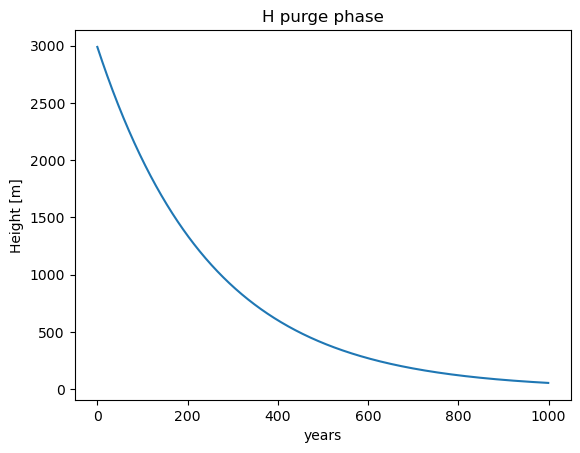

In [4]:
Z_0 = 1e3 # m
A_sl = 0.5 # ms^-1
tau_is = 250 # yrs

def plot_H_purge(_H = 3000, tau_is = 250):
    x = []
    y = []
    H = _H
    for i in range(1000):
        H += -H/tau_is
        x.append(i)
        y.append(H)
    plt.plot(x,y)
    plt.xlabel("years")
    plt.ylabel("Height [m]")
    plt.title("H purge phase")

plot_H_purge()

Modelling $A$ I need a starting height $H(0)$. From MacAyeal I start with $H(0)=1000m$.

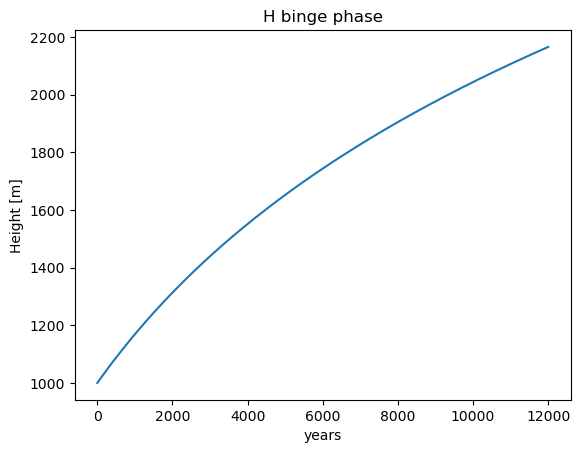

In [5]:
def plot_H_binge(_H0 = 1000, _Asl = A_sl, _Z0 = Z_0):
    x = []
    y = []
    H = _H0
    A = _Asl*np.exp(-H/_Z0)
    for i in range(12000):
        H += A
        A = _Asl*np.exp(-H/_Z0)
        x.append(i)
        y.append(H)
    plt.plot(x,y)
    plt.xlabel("years")
    plt.ylabel("Height [m]")
    plt.title("H binge phase")

plot_H_binge()

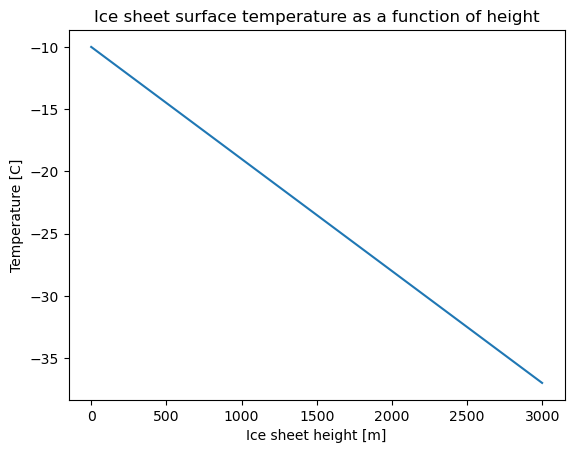

In [6]:
def plot_theta_surface(G_a = 9E-3, theta_sl = -10):
    H = []
    y = []
    for i in range(3000):
        H.append(i)
        y.append(theta_sl - G_a*i)
    plt.plot(H,y)
    plt.xlabel("Ice sheet height [m]")
    plt.ylabel("Temperature [C]")
    plt.title("Ice sheet surface temperature as a function of height")


plot_theta_surface()

Algorithm:

1. Evaluate $\theta_b$
2. Calculate $\frac{\partial H}{\partial t}$
3. Calculate solve $\theta_b$ with Crank-Nicolson

# Binge-purge simulation

In [29]:
YR=60*60*24*365

class Simulation:
    def __init__(self, initial_temp, grid_size, time_step, max_iterations):
        self.temperature = initial_temp
        self.grid_size = grid_size
        self.time_step = time_step
        self.max_iterations = max_iterations
        self.current_iteration = 0
        self.is_binging_phase = True  # Start in binging phase
        self.report_freq = 100
        self.grid = np.ones(self.grid_size)*initial_temp

        self.Z0 = 1e3 # m
        self.H = 1000 # m
        self.H_min = self.H/50
        self.Asl = 0.5 # m yr^-1
        self.kappa = 1.4E-6 * YR # m^2 s^-1
        self.theta_sl = -10
        self.gamma_a = 9E-3# 9   # C km^-1
        self.G = 0.05 * YR # W m^-2
        self.k = 2 * YR # W C^-1 m^-1
        self.threshold = 1E-2
        self.tau_is = 250
        self.T = []
        self.xi = (np.linspace(0, self.H, self.grid_size)) / self.H
        self.g = 9.82 * YR**2
        self.rho = 917

        self.H_hist = []

        self.Time = np.linspace(0, max_iterations*time_step, max_iterations)
        self.switch = [] # Times when a switch occurs

        self.geo_bot = 0

        self.dzeta = 1/self.grid_size


    """
    Solving the tridiagonal problem.
    Constructing the tridiagonal A and B matrices and solving with scipy.solve_banded.
    """
    
    def tridiag(self, diag, upper, lower):
        """
        Build a N-by-N tridiagonal matrix.
        Input:
            Diag:
                Scalar or N-vector
            Upper/Lower:
                Scaler or (N-1)-vector
        """
        T_diag = np.full(self.grid_size, diag)
        T_upper = np.full(self.grid_size-1, upper)
        T_lower = np.full(self.grid_size-1, lower)
        T = np.diag(T_diag)
        T += np.diag(T_upper, k=1)  # k=1 for upper diagonal
        T += np.diag(T_lower, k=-1)  # k=-1 for lower diagonal
        return T

    def A_matrix(self, diag, upper, lower):
        """
        Construct the A matrix in our Ax=Bx problem.
        Sets the appropriate boundary conditions for A.
        Input:
            Diag:
                Scalar or N-vector
            Upper/Lower:
                Scaler or (N-1)-vector
        """
        M = self.tridiag(diag, upper, lower)
        M[0,0] = -1
        M[0,1] = 1
        M[-1,:] = 0 # Don't understand this boundary condition
        M[-1,-1] = 1
        return M

    def B_matrix(self, diag, upper, lower):
        """
        Construct the B matrix in our Ax=Bx problem
        Sets the appropriate boundary conditions for B.
        Input:
            Diag:
                Scalar or N-vector
            Upper/Lower:
                Scaler or (N-1)-vector
        """
        M = self.tridiag(diag, upper, lower)
        M[0,:] = 0
        M[-1,:] = 0
        return M

    def solve_tridiag_banded(self, A,b):
        banded_diag = np.diag(A, k=0)
        banded_upper = np.diag(A, k=1)
        banded_upper = np.pad(banded_upper, (len(banded_diag) - len(banded_upper), 0), mode='constant', constant_values=0)
        banded_lower = np.diag(A, k=-1)
        banded_lower = np.pad(banded_lower, (0, len(banded_diag) - len(banded_lower)), mode='constant', constant_values=0)
        banded_tridiag = np.array([banded_upper, banded_diag, banded_lower])
        return solve_banded((1, 1), banded_tridiag, b)

    def binge_bc(self, delta_xi):
        """
        Constructs the boundary conditions to solve for.
        """
        bc = np.zeros(self.grid_size)
        bc[-1] = self.theta_s()
        bc[0] = -self.G*delta_xi*self.H/self.k
        return bc

    def purge_bc(self, delta_xi):
        """
        Constructs the boundary conditions to solve for.
        """
        bc = np.zeros(self.grid_size)
        bc[-1] = self.theta_s()
        bc[0] = 0
        return bc

    def binging_phase_step(self):
        """
        Binging phase.
        Constructs the x dimension and scales with height (xi).
        Defines a delta_xi.
        Constructs r and s.
        Constructs A and B matrix and boundary conditions.
        """
        
        A_prev = self.A()
        H_prev = self.H
        self.H += self.A()*self.time_step

        self.xi = (np.linspace(1, self.H, self.grid_size)) / self.H # FROM 1 NOT 0, OTHER SOLN ALIGNMENT
        delta_xi = self.xi[1]-self.xi[0]
        #delta_xi = self.dzeta # OTHER SOLN ALIGNMENT

        r = (self.kappa * self.time_step) / (2 * self.H**2 * delta_xi**2)
        s = (self.xi*A_prev*self.time_step) / (4*self.H*delta_xi) # no slice, moved to diags OTHER SOLN ALIGNMENT

        r_prev = (self.kappa * self.time_step) / (2 * H_prev**2 * delta_xi**2) # Needed for current step, OTHER SOLN ALIGNMENT
        s_prev = (self.xi*A_prev*self.time_step) / (4*H_prev*delta_xi)
        
        bc = self.binge_bc(delta_xi)

        A = self.A_matrix(1 + 2*r, -(r + s[:-1]), -(r - s[1:])) # slicing for upper and lower, OTHER SOLN ALIGNMENT
        B = self.B_matrix(1 - 2*r_prev, (r_prev + s_prev[:-1]), (r_prev - s_prev[1:]))
        
#        x = np.linalg.inv(A) @ (B@self.grid + bc)
        x = self.solve_tridiag_banded(A, B@self.grid + bc)
        self.grid = x
        

    def purging_phase_step(self):

        #A_prev = self.A()
        H_prev = self.H
        self.H += -(self.H*self.time_step)/self.tau_is

        
        self.xi = (np.linspace(0, self.H, self.grid_size)) / self.H
        delta_xi = self.xi[1]-self.xi[0]
        #delta_xi = self.dzeta # OTHER SOLN ALIGNMENT
        
        r = (self.kappa * self.time_step) / (2 * self.H**2 * delta_xi**2)
        s = (self.xi * (-H_prev/self.tau_is)*self.time_step) / (4*self.H*delta_xi)

        r_prev = (self.kappa * self.time_step) / (2 * H_prev**2 * delta_xi**2)
        s_prev = (self.xi * (-H_prev/self.tau_is)*self.time_step) / (4*H_prev*delta_xi)
        
        #bc = self.purge_bc(delta_xi)
        bc = self.binge_bc(delta_xi) # OTHER SOLN ALIGNMENT

        
#        A = self.A_matrix(1 + 2*r, -r, -r)
#        B = self.B_matrix(1 - 2*r, r, r)
        A = self.A_matrix(1 + 2*r, -(r + s[:-1]), -(r - s[1:]))
        B = self.B_matrix(1 - 2*r_prev, (r_prev + s_prev[:-1]), (r_prev - s_prev[1:]))
        
#        x = np.linalg.inv(A) @ (B@self.grid + bc)

        x = self.solve_tridiag_banded(A, B@self.grid + bc)
        self.grid = x
    
    def purge_end_thresh(self):
        """
        Attempt at a threshold to again switch to purge.
        """
        # Not sure about this
        ghk = self.G*(self.H)
        ghk = ghk/self.k
        grht = self.g*self.rho*((self.H)**3)
        grht = grht/(self.tau_is*self.k)
        
        return -(ghk + grht) * (1/self.grid_size)


    def grad_bottom(self):
        """
        Gradient at the bottom?
        """
        # Not sure about this
        delta_xi = self.xi[1]-self.xi[0]
        return -self.G*delta_xi*self.H/self.k

    def update_geo_bot(self):
        if self.is_binging_phase:
            #pass
            #self.get_bot = 0
            self.geo_bot -= self.time_step*(self.rho * self.g*self.H**2)/self.tau_is
        else:
            pass
            #self.geo_bot -= (self.rho * self.g*self.H**2)/self.tau_is
    
    def theta_s(self):
        return self.theta_sl - self.gamma_a*self.H
    
    def A(self):
        return self.Asl * np.exp(-self.H/self.Z0)


    """
    Simulation
    """
    def run_simulation(self):
        while self.step():
            if self.current_iteration % self.report_freq == 0:  # Adjust reporting frequency as needed
                self.report_status()

    def step(self):
        if self.current_iteration >= self.max_iterations:
            return False  # Simulation complete

        self.evaluate_phase() # Evaluates binge or purge
        self.update_geo_bot()
        
        if self.is_binging_phase:
            self.binging_phase_step()
        else:
            #self.enforce_min_H()
            self.purging_phase_step()

        self.H_hist.append(self.H)
        self.T.append(np.copy(self.grid))
        self.current_iteration += 1
        return True  # Simulation continues

    def evaluate_phase(self):
        # Check bottom temperature and determine phase
        bottom_temp = self.grid[0]
        current_phase = self.is_binging_phase
        if self.is_binging_phase:
            if bottom_temp >= 0:
                self.is_binging_phase = False
        elif not self.is_binging_phase:
            if bottom_temp < 0:
#            if False:
#            if self.purge_end_thresh() >= self.geo_bot:
#            if self.purge_end_thresh() >= self.grad_bottom():
                self.is_binging_phase = True

        if self.is_binging_phase != current_phase:
            self.switch.append(self.current_iteration*self.time_step)

    def enforce_min_H(self):
        if self.H <= self.H_min:
#            return # Disabled
            self.H = self.Z0/10
#            self.is_binging_phase = True
    
    """
    Other stuff
    """
    def print_params(self):
        print(self.grid[0], self.theta_sl, self.H, self.Z0, self.dzeta, self.kappa, self.gamma_a, self.k, self.G, self.tau_is, self.Asl)
#            print(T_0[0], T_sl[0], H_0, Z0, dzeta, kappa, lapse, k, tau_is, A_sl)

        print(f"Kappa: {self.kappa}")
        print(f"Eq. 40: {self.eq40()}")
    
    def set_report_freq(self, frequency):
        self.report_freq = frequency

    def report_status(self):
        phase = "Binging" if self.is_binging_phase else "Purging"
        print(f"Phase: {phase}; H: {self.H}; T_0: {self.grid[0]}; T_N: {self.grid[-1]}; T_max: {self.grid.max()}; grad_xi: {self.grad_bottom()}; thresh: {self.purge_end_thresh()}")

    def print_grid(self):
        print("Shape:", self.grid.shape)
        print("Head:", self.grid[:10])
        print("Avg:", self.grid.mean())

    def print_basal_temp(self):
        print("Basal temp:", self.grid[0])

    def eq40(self):
        T = (-self.k*self.Asl) / (2*(self.G - self.k*self.gamma_a))
        T = T**2
        T = T*(np.pi/self.kappa)
        return T


-10.0 -10 1000 1000.0 0.002 44.1504 0.009 63072000 1576800.0 250 0.5
Kappa: 44.1504
Eq. 40: 17.372218461051784
Phase: Binging; H: 1000; T_0: -10.0; T_N: -10.0; T_max: -10.0; grad_xi: -0.0501002004008016; thresh: -1135919151360000.0
(150, 500) (150,) (150,)


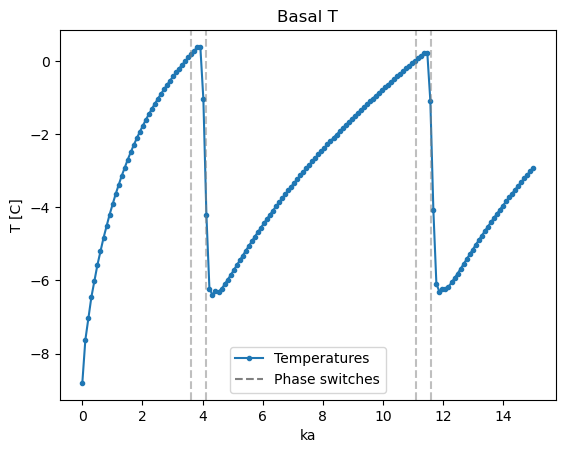

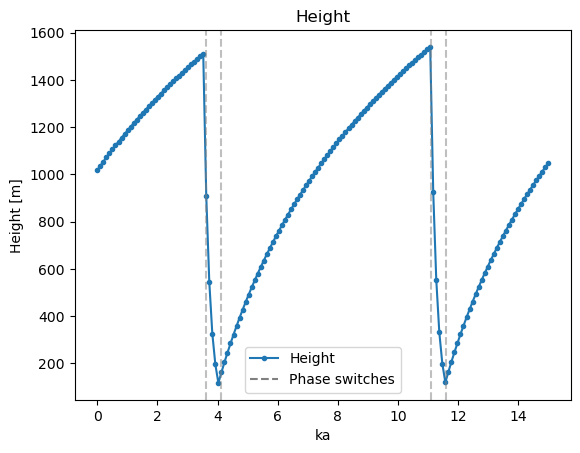

In [30]:
fac = 4
T0 = -10
grid_size = 500
time_step = 100
years = 15E3
max_iterations = int(years/time_step)
sim = Simulation(T0, grid_size, time_step, max_iterations)
sim.print_params()
sim.set_report_freq(500)

#sim.print_grid()
#sim.print_basal_temp()

sim.report_status()
sim.run_simulation()
#sim.print_basal_temp()

simT = np.array(sim.T)
simTime = sim.Time
simH = np.array(sim.H_hist)
simSwitch = np.array(sim.switch)

print(simT.shape, simH.shape, simTime.shape)

plt.plot(simTime/1000, simT[:,0], label="Temperatures", marker=".")
for s in simSwitch: plt.axvline(s/1000, color="grey", alpha=0.5, linestyle="dashed")
plt.plot([], [], color="grey", linestyle="dashed", label="Phase switches")
#plt.axhline(0)
plt.title("Basal T")
plt.xlabel("ka")
plt.ylabel("T [C]")
plt.legend()
#plt.axvline(920)
#plt.axvline(3.5)
plt.show()

plt.plot(simTime/1000, simH, label="Height", marker=".")
for s in simSwitch: plt.axvline(s/1000, color="grey", alpha=0.5, linestyle="dashed")
plt.plot([], [], color="grey", linestyle="dashed", label="Phase switches")
plt.title("Height")
plt.xlabel("ka")
plt.ylabel("Height [m]")
plt.legend()
#plt.axvline(3.5)

#plt.axvline(920)



# Aligning the solutions

Went through the other groups solution and found every difference.

## Differences

- The coefficients $r$ and $s$ depend on the height and the accumulation. There maybe be nuances in which height you take. For instance, when we solve the tridiagonal problem, we have a left-hand-side with an operator that acts on the next temperature gradient and a right-hand-side that acts on the current. We are solving for the next. The operators (matrices) depend on the height and accumulation! We have taken the solution from the other group where they use the *previous* height for the right-hand-side. I think this is important.

- Some slight dimensional differences in which parts of the $r$ and $s$ factors are applied to the tridiagonal. You get an array that is larger than can be fit in the off-diagonals, and then you can slice [:-1] (first to second-to-last) and [1:] (second to end). Probably not a big affects.

- Same boundary conditions for the binge and purge state. Despite the MacAyeal article, the other group used the same conditions for both phases. From the artcle, the binge phase has a boundary condition that transfers heat, but in the purge phase the boundary condition for the bed should be stuck at 0. By keeping the same boundary condition, it looks like the temperature still increases for a while before decreasing, and when it then dips below zero it's a good time to switch to binge again.

- Switch phases based on temperature only. This only works when keeping the same boundary conditions I think.

- The other group used $\Delta z$ in places where we think there should be $\Delta \xi$ (for instance in the coefficients).